In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
import seaborn as sns

In [4]:
# import from csv fine and see the head
mov_train=pd.read_csv("./DataSets/mov_train.csv")
mov_train.head()
actors=pd.read_csv("./DataSets/actors.csv")
actors['name'] = actors['Unnamed: 0']
actors.head()
good_actors = actors[actors.Score>0.45]
good_actors.head()

,Unnamed: 0,MoviesN,AvgPop,AvgIMDB,Score,name
0,Stan Lee,8,0.257924,0.762346,0.606930,Stan Lee
1,Gino Corrado,6,0.027834,0.849794,0.574599,Gino Corrado
2,Joseph Oliveira,5,0.163211,0.861728,0.574432,Joseph Oliveira
3,Andy Serkis,10,0.117575,0.766667,0.571418,Andy Serkis
4,Philip Ettington,15,0.053379,0.772840,0.556998,Philip Ettington


In [5]:
# drop unnecessary columns
mov_train.drop(columns = ['id', 'Unnamed: 0','overview','tagline'],inplace=True)

In [6]:
# check if any movie is not released
mov_train[mov_train['status']!='Released']

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,popularity,poster_path,production_companies,...,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,imdb_rating,numVotes
609,"[{'id': 144200, 'name': 'Swan Princess Series'...",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",NaN,tt0120254,en,The Swan Princess: Escape from Castle Mountain,5.121309,/oTEgvTpAIugS7OH6oIoVZkmV3C3.jpg,NaN,...,71.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}, {'iso_6...",Rumored,The Swan Princess: Escape from Castle Mountain,"[{'id': 3071, 'name': 'prince'}, {'id': 4456, ...","[{'cast_id': 2, 'character': 'Odette (voice)',...","[{'credit_id': '52fe488bc3a36847f816cfd3', 'de...",273644,5.6,3744.0
1007,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt1860180,en,Billy Gardell: Halftime,0.007877,/3ypM4bwZTvUfXiKJTs0BaEZuBhe.jpg,NaN,...,60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,Billy Gardell: Halftime,NaN,"[{'cast_id': 9, 'character': 'Himself', 'credi...","[{'credit_id': '52fe4be1c3a368484e19d265', 'de...",60,7.6,111.0
1216,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,tt0091024,en,Extremities,10.273979,/pMN14kaump5CrzbSl1C0a2E0M4f.jpg,"[{'name': 'Atlantic Entertainment Group', 'id'...",...,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,Extremities,"[{'id': 2483, 'name': 'nudity'}, {'id': 2539, ...","[{'cast_id': 1, 'character': 'Marjorie', 'cred...","[{'credit_id': '582cca1c925141780b00259f', 'de...",13418091,6.3,3982.0
1618,NaN,891000,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0145394,en,A Place Called Chiapas,0.179246,/4j9U7QMT5D5HhUoIsoAI1niVqz8.jpg,NaN,...,89.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,A Place Called Chiapas,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '57b4f7619251417287000dfc', 'de...",229000,7.4,392.0


In [7]:
# extract all the genres
genres=set()
for item in mov_train.genres:
    if isinstance(item,str):
        x=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
        for s in x:
            genres.add(s.groupdict()['name'])
print(genres)

{'Animation', 'War', 'Western', 'Drama', 'Music', 'Foreign', 'Thriller', 'History', 'Fantasy', 'Romance', 'Comedy', 'Documentary', 'Crime', 'Mystery', 'Horror', 'Family', 'Action', 'Adventure'}


In [8]:
# created new colums for month and year and filled it in by extracting them from the release date
mov_train['month']=0
mov_train['year']=0
for j in mov_train.index:
    string=mov_train['release_date'].iloc[j]
    x=re.findall("([\d]{1,2})/([\d]{1,2})/([\d]{1,2})",string)
    mov_train.loc[j,"month"] = int(x[0][0])
    year = int(x[0][2])
    if year<23:
        mov_train.loc[j,"year"] = 2000 + year
    else:
        mov_train.loc[j,"year"] = 1900+ year

In [9]:
print(mov_train['year'].min())
print(mov_train['year'].max())

1924
2021


In [10]:
# we want to adjust the revenue and budget to account for inflation
inflation=pd.read_csv("./DataSets/inflation_data.csv")

In [11]:
inflation.loc[0,'amount']

1.0

In [12]:
revenue_zero = mov_train[mov_train['revenue']==0]
print(revenue_zero)

Empty DataFrame
Columns: [belongs_to_collection, budget, genres, homepage, imdb_id, original_language, original_title, popularity, poster_path, production_companies, production_countries, release_date, runtime, spoken_languages, status, title, Keywords, cast, crew, revenue, imdb_rating, numVotes, month, year]
Index: []

[0 rows x 24 columns]


In [13]:
mov_train['infl_budget']=0
mov_train['infl_revenue']=0

In [14]:
for j in mov_train.index:
    x = mov_train.loc[j,"year"]
    y = inflation.loc[x-1900,'amount']
    mov_train.loc[j,'infl_budget'] = mov_train.loc[j,'budget']*35.48/y
    mov_train.loc[j,'infl_revenue'] = mov_train.loc[j,'revenue']*35.48/y
    
mov_train.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,popularity,poster_path,production_companies,...,Keywords,cast,crew,revenue,imdb_rating,numVotes,month,year,infl_budget,infl_revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,5.0,39572.0,2,2015,1.760170e+07,1.548277e+07
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,5.8,82272.0,8,2004,6.310360e+07,1.501068e+08
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,8.5,852772.0,10,2014,4.154862e+06,1.648347e+07
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,...,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,8.1,63220.0,3,2012,1.557849e+06,2.077131e+07
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,...,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,5.7,316.0,2,2009,0.000000e+00,5.451153e+06


In [15]:
# for films which have budget = 0, we will replace it with the average of budget of all films released within 3 years of that movie, and sharing a genre
mov_train['mod_budget'] = mov_train['infl_budget']
budget_zero = mov_train[mov_train['budget']==0]
for j in budget_zero.index:
    x = budget_zero.loc[j,'year']
    this_genres=set()
    item = budget_zero.loc[j,'genres']
    if(type(item)==str):
        y=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
        for s in y:
            this_genres.add(s.groupdict()['name'])
    total = 0
    total_2 = 0
    count = 0
    count_2 = 0
    for k in mov_train.index:
        if k not in budget_zero.index:
            if abs(mov_train.loc[k,'year'] - x)<= 3:
                total_2 = total_2 + mov_train.loc[k,'infl_budget']
                count_2 = count_2 + 1
                that_genres=set()
                item = mov_train.loc[k,'genres']
                if(type(item)==str):
                    y=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
                    for s in y:
                        that_genres.add(s.groupdict()['name'])
                    if len(this_genres.intersection(that_genres))!= 0:
                        total = total + mov_train.loc[k,'infl_budget']
                        count = count + 1
    if count == 0:
        average = total_2/count_2
    else:
        average = total/count
    mov_train.loc[j,'mod_budget'] = average

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000178F7F006A0>,
      dtype=object)

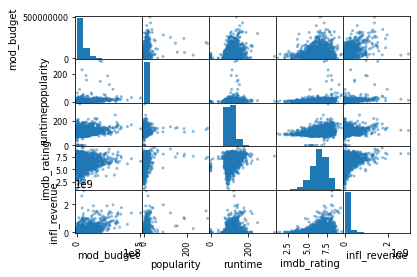

In [16]:
pd.plotting.scatter_matrix(mov_train[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']])

In [17]:
corr_matrix1 = mov_train[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']].corr()
print(corr_matrix1)

              mod_budget  popularity   runtime  imdb_rating  infl_revenue
mod_budget      1.000000    0.272392  0.260203     0.004243      0.594614
popularity      0.272392    1.000000  0.133690     0.159394      0.383882
runtime         0.260203    0.133690  1.000000     0.346248      0.254896
imdb_rating     0.004243    0.159394  0.346248     1.000000      0.206060
infl_revenue    0.594614    0.383882  0.254896     0.206060      1.000000


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
mov_train_standard=mov_train.copy()
scaler=StandardScaler()
scaler.fit(mov_train_standard[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']])
mov_train_standard[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']]=scaler.transform(mov_train_standard[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']])

In [19]:
corr_matrix2 = mov_train_standard[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']].corr()
print(corr_matrix2)

              mod_budget  popularity   runtime  imdb_rating  infl_revenue
mod_budget      1.000000    0.272392  0.260203     0.004243      0.594614
popularity      0.272392    1.000000  0.133690     0.159394      0.383882
runtime         0.260203    0.133690  1.000000     0.346248      0.254896
imdb_rating     0.004243    0.159394  0.346248     1.000000      0.206060
infl_revenue    0.594614    0.383882  0.254896     0.206060      1.000000


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
mov_train_minmax=mov_train.copy()
scaler2=MinMaxScaler()
scaler2.fit(mov_train_minmax[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']])
mov_train_minmax[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']]=scaler2.transform(mov_train_minmax[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']])

In [21]:
corr_matrix3 = mov_train_minmax[['mod_budget','popularity','runtime','imdb_rating','infl_revenue']].corr()
print(corr_matrix3)

              mod_budget  popularity   runtime  imdb_rating  infl_revenue
mod_budget      1.000000    0.272392  0.260203     0.004243      0.594614
popularity      0.272392    1.000000  0.133690     0.159394      0.383882
runtime         0.260203    0.133690  1.000000     0.346248      0.254896
imdb_rating     0.004243    0.159394  0.346248     1.000000      0.206060
infl_revenue    0.594614    0.383882  0.254896     0.206060      1.000000


In [22]:
mov_train['log_mod_budget']=np.log(mov_train['mod_budget'])
mov_train['log_infl_revenue']=np.log(mov_train['infl_revenue'])

In [23]:
corr_matrix4 = mov_train[['log_mod_budget','popularity','runtime','imdb_rating','log_infl_revenue']].corr()
print(corr_matrix4)

                  log_mod_budget  popularity   runtime  imdb_rating  \
log_mod_budget          1.000000    0.165197  0.133150    -0.045222   
popularity              0.165197    1.000000  0.133690     0.159394   
runtime                 0.133150    0.133690  1.000000     0.346248   
imdb_rating            -0.045222    0.159394  0.346248     1.000000   
log_infl_revenue        0.424107    0.270317  0.218957     0.137368   

                  log_infl_revenue  
log_mod_budget            0.424107  
popularity                0.270317  
runtime                   0.218957  
imdb_rating               0.137368  
log_infl_revenue          1.000000  


In [24]:
mov_train['num_good_actors']=0
for j in mov_train.index:
    set_actors=set()
    item = mov_train.loc[j,'cast']
    if(type(item)==str):
        x=re.finditer("(\'name\':\s\')(?P<name>[\w\.\s]*)(?=\')",item)
        for s in x:
            set_actors.add(s.groupdict()['name'])
    for actor in set_actors:
        if actor in good_actors['name'].values:
            mov_train.loc[j,'num_good_actors'] = mov_train.loc[j,'num_good_actors'] + 1

In [25]:
mov_train['actor_score']=0

In [26]:
mov_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  604 non-null    object 
 1   budget                 3000 non-null   int64  
 2   genres                 2993 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   popularity             3000 non-null   float64
 8   poster_path            2999 non-null   object 
 9   production_companies   2844 non-null   object 
 10  production_countries   2945 non-null   object 
 11  release_date           3000 non-null   object 
 12  runtime                2998 non-null   float64
 13  spoken_languages       2980 non-null   object 
 14  status                 3000 non-null   object 
 15  titl

In [27]:
for j in mov_train.index:
    set_actors=set()
    item = mov_train.loc[j,'cast']
    if(type(item)==str):
        x=re.finditer("(\'name\':\s\')(?P<name>[\w\.\s]*)(?=\')",item)
        for s in x:
            set_actors.add(s.groupdict()['name'])
    for actor in set_actors:
        mov_train.loc[j,'actor_score'] = mov_train.loc[j,'actor_score'] + actors[actors.name ==actor].Score.iloc[0]
mov_train.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,popularity,poster_path,production_companies,...,numVotes,month,year,infl_budget,infl_revenue,mod_budget,log_mod_budget,log_infl_revenue,num_good_actors,actor_score
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,39572.0,2,2015,1.760170e+07,1.548277e+07,1.760170e+07,16.683506,16.555238,1,5.076238
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,82272.0,8,2004,6.310360e+07,1.501068e+08,6.310360e+07,17.960288,18.826858,2,4.341203
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,852772.0,10,2014,4.154862e+06,1.648347e+07,4.154862e+06,15.239790,16.617869,4,7.478720
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,...,63220.0,3,2012,1.557849e+06,2.077131e+07,1.557849e+06,14.258816,16.849083,0,0.826697
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,...,316.0,2,2009,0.000000e+00,5.451153e+06,6.105908e+07,17.927352,15.511338,0,0.000000


In [28]:
print(mov_train[mov_train.actor_score == 0])

                                  belongs_to_collection     budget  \
4                                                   NaN          0   
233                                                 NaN          0   
518   [{'id': 468552, 'name': 'Wonder Woman Collecti...  149000000   
611                                                 NaN    8575000   
680                                                 NaN  125000000   
773                                                 NaN          0   
906   [{'id': 263, 'name': 'The Dark Knight Collecti...  250000000   
910                                                 NaN          0   
934   [{'id': 404609, 'name': 'John Wick Collection'...   40000000   
1136  [{'id': 34055, 'name': 'Pokémon Collection', '...          0   
1141                                                NaN          0   
1157                                                NaN    3500000   
1303                                                NaN    1500000   
1395  [{'id': 4563, 

In [29]:
corr_matrix5 = mov_train[['infl_revenue','log_infl_revenue','num_good_actors']].corr()
print(corr_matrix5)

                  infl_revenue  log_infl_revenue  num_good_actors
infl_revenue          1.000000          0.513754         0.384511
log_infl_revenue      0.513754          1.000000         0.354544
num_good_actors       0.384511          0.354544         1.000000


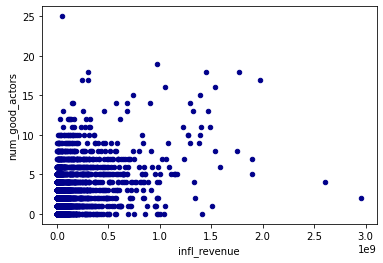

In [30]:
ax1 = mov_train.plot.scatter(x='infl_revenue',y='num_good_actors',c='DarkBlue')

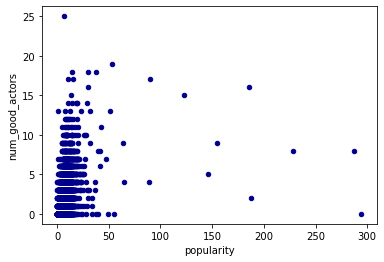

In [31]:
ax1 = mov_train.plot.scatter(x='popularity',y='num_good_actors',c='DarkBlue')

In [32]:
genres=set()
for item in mov_train.genres:
    if(type(item)==str):
        x=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
        for s in x:
            genres.add(s.groupdict()['name'])

In [33]:
for genre in genres:
    mov_train[genre]=0

In [34]:
for genre in genres:
    mov_train[genre]=0
for j in mov_train.index:
    row_genres=set()
    item = mov_train.loc[j,'genres']
    if(type(item)==str):
        x=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
        for s in x:
            row_genres.add(s.groupdict()['name'])
    for genre in row_genres:
        mov_train.loc[j,genre]=mov_train.loc[j,genre]+1
mov_train.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,popularity,poster_path,production_companies,...,Fantasy,Romance,Comedy,Documentary,Crime,Mystery,Horror,Family,Action,Adventure
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,0,0,1,0,0,0,0,0,0,0
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,0,1,1,0,0,0,0,1,0,0
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,0,0,0,0,0,0,0,0,0,0
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,...,0,0,0,0,0,0,0,0,0,0
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,...,0,0,0,0,0,0,0,0,1,0


In [35]:
corr_matrix6 = mov_train[['infl_revenue','mod_budget','num_good_actors','actor_score']].corr()
print(corr_matrix6)

                 infl_revenue  mod_budget  num_good_actors  actor_score
infl_revenue         1.000000    0.594614         0.384511     0.425428
mod_budget           0.594614    1.000000         0.415074     0.414981
num_good_actors      0.384511    0.415074         1.000000     0.789874
actor_score          0.425428    0.414981         0.789874     1.000000


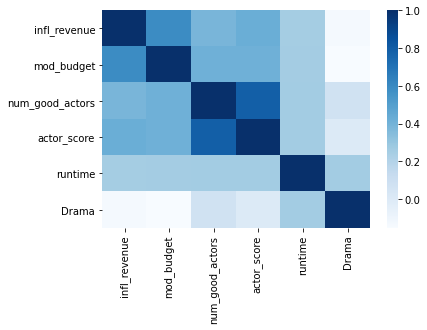

In [36]:
sns.heatmap(mov_train[['infl_revenue','mod_budget','num_good_actors','actor_score','runtime','Drama']].corr(),cmap='Blues')

In [38]:
mov_train['imdb_rating'].fillna(mov_train['imdb_rating'].mean(),inplace = True)

In [39]:
mov_train['runtime'].fillna(mov_train['runtime'].mean(),inplace = True)

In [40]:
mov_train['actor_score'].fillna(mov_train['actor_score'].mean(),inplace = True)

In [41]:
mov_train[mov_train.num_good_actors > 1].head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,popularity,poster_path,production_companies,...,Romance,Comedy,Documentary,Crime,Mystery,Horror,Family,Action,Adventure,phony
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,1,1,0,0,0,0,1,0,0,1
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,0,0,0,0,0,0,0,0,0,1
8,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,0,1,0,0,0,0,1,1,1,1
9,NaN,6000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,tt0310281,en,A Mighty Wind,4.672036,/xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 97}]",...,0,1,0,0,0,0,0,0,0,1
10,"[{'id': 1575, 'name': 'Rocky Collection', 'pos...",1000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0075148,en,Rocky,14.774066,/i5xiwdSsrecBvO7mIfAJixeEDSg.jpg,"[{'name': 'United Artists', 'id': 60}]",...,0,0,0,0,0,0,0,0,0,1


In [66]:
# add homepage revenue comparison
# add number of films by genre and the average revenue for each
# add number of films in each year and average revenue by year
# do good production companies similar to good actors

In [67]:
movies=pd.read_csv("./DataSets/Movies.csv")
movies.head()   

,revenue,vote_average,vote_count,title,original_language,release_date,production_companies,production_countries,genres,director,producer,cast,runtimes,writer
0,4300000,6.6,714,Four Rooms,en,1995-12-09,"Miramax Films,A Band Apart",United States of America,"Crime,Comedy","Allison Anders,Alexandre Rockwell,Robert Rodri...","Lawrence Bender,Paul Hellerman,Scott Lambert,","Sammi Davis,Amanda De Cadenet,Valeria Golino,",98.0,"Allison Anders,Alexandre Rockwell,Robert Rodri..."
1,12,6.4,96,Judgment Night,en,1993-10-15,"Universal Pictures,Largo Entertainment,JVC Ent...","Japan,United States of America","Action,Thriller,Crime",Stephen Hopkins,"Gene Levy,Christopher Mollo,Lloyd Segan,","Emilio Estevez,Cuba Gooding Jr.,Denis Leary,",110.0,"Lewis Colick,Jere Cunningham,Lewis Colick"
2,775398007,8.1,8550,Star Wars,en,1977-05-25,"Lucasfilm,20th Century Fox",United States of America,"Adventure,Action,Science Fiction",George Lucas,"Gary Kurtz,George Lucas,Rick McCallum","Mark Hamill,Harrison Ford,Carrie Fisher,",121.0,George Lucas
3,940335536,7.7,8085,Finding Nemo,en,2003-05-30,Pixar,United States of America,"Animation,Family","Andrew Stanton,Lee Unkrich","Jinko Gotoh,John Lasseter,Graham Walters","Albert Brooks,Ellen DeGeneres,Alexander Gould,",100.0,"Andrew Stanton,Andrew Stanton,Bob Peterson,"
4,677945399,8.3,10346,Forrest Gump,en,1994-07-06,Paramount,United States of America,"Comedy,Drama,Romance",Robert Zemeckis,"Wendy Finerman,Charles Newirth,Steve Starkey,","Tom Hanks,Rebecca Williams,Sally Field,",142.0,"Winston Groom,Eric Roth"


In [68]:
mov_test['revenue']=0

In [69]:
for j in mov_test.index:
    name = mov_test.loc[j,'title']
    temp = movies[movies.title==name]
    if len(temp) == 1:
        mov_test.loc[j,'revenue']= temp.revenue.iloc[0]

In [70]:
mov_test.head()

,Unnamed: 0,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,Romance,Comedy,Documentary,Crime,Mystery,Horror,Family,Action,Adventure,revenue
0,0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,...,0,0,0,0,0,0,1,0,1,0
1,1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,...,0,0,0,0,0,1,0,0,0,480000
2,2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,...,1,1,0,0,0,0,0,0,0,34673095
3,3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,...,0,0,0,0,1,0,0,0,0,0
4,4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",...,0,0,1,0,0,0,0,0,0,653621


In [71]:
mov_year = pd.DataFrame(columns = ['year','number_movies','tot_budget','avg_budget','tot_revenue','avg_revenue','tot_mod_budget','avg_mod_budget','tot_infl_revenue','avg_infl_revenue'])

In [72]:
for j in range(1922,2023):
    mov_year.loc[j-1922] = [j,0,0,0,0,0,0,0,0,0]
for j in mov_train.index:
    y = mov_train.loc[j,'year']
    mov_year.loc[y-1922,'number_movies'] = mov_year.loc[y-1922,'number_movies'] + 1
    mov_year.loc[y-1922,'tot_revenue'] = mov_year.loc[y-1922,'tot_revenue'] + mov_train.loc[j,'revenue']
    mov_year.loc[y-1922,'tot_budget'] = mov_year.loc[y-1922,'tot_budget'] + mov_train.loc[j,'budget']
    mov_year.loc[y-1922,'tot_infl_revenue'] = mov_year.loc[y-1922,'tot_infl_revenue'] + mov_train.loc[j,'infl_revenue']
    mov_year.loc[y-1922,'tot_mod_budget'] = mov_year.loc[y-1922,'tot_mod_budget'] + mov_train.loc[j,'mod_budget']

In [73]:
mov_year.head()

,year,number_movies,tot_budget,avg_budget,tot_revenue,avg_revenue,tot_mod_budget,avg_mod_budget,tot_infl_revenue,avg_infl_revenue
0,1922,0,0,0,0,0,0,0,0,0
1,1923,0,0,0,0,0,0,0,0,0
2,1924,1,1135654,0,1213880,0,1.97515e+07,0,2.1112e+07,0
3,1925,2,592,0,45101,0,7.57399e+06,0,769319,0
4,1926,1,463455,0,966878,0,7.79307e+06,0,1.62582e+07,0


In [74]:
for j in mov_year.index:
    if mov_year.loc[j,'number_movies'] != 0:
        mov_year.loc[j,'avg_revenue'] = mov_year.loc[j,'tot_revenue']/mov_year.loc[j,'number_movies']
        mov_year.loc[j,'avg_budget'] = mov_year.loc[j,'tot_budget']/mov_year.loc[j,'number_movies']
        mov_year.loc[j,'avg_infl_revenue'] = mov_year.loc[j,'tot_infl_revenue']/mov_year.loc[j,'number_movies']
        mov_year.loc[j,'avg_mod_budget'] = mov_year.loc[j,'tot_mod_budget']/mov_year.loc[j,'number_movies']

<BarContainer object of 101 artists>

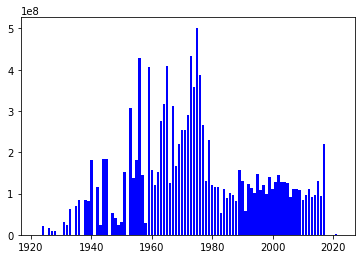

In [75]:
plt.bar(mov_year.year,mov_year.avg_infl_revenue, color = 'b')

(0.0, 500000000.0)

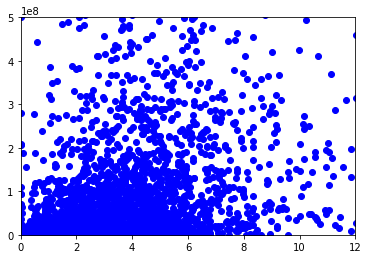

In [76]:
plt.scatter(mov_train.actor_score,mov_train.infl_revenue, color = 'b')
plt.xlim([0,12])
plt.ylim([0,0.5e9])

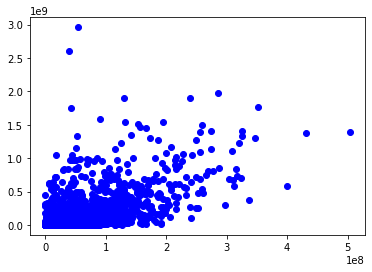

In [77]:
plt.scatter(mov_train.mod_budget,mov_train.infl_revenue, color = 'b')

<BarContainer object of 101 artists>

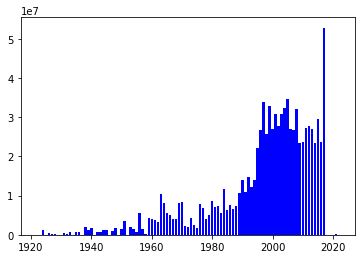

In [78]:
plt.bar(mov_year.year,mov_year.avg_budget, color = 'b')

<BarContainer object of 101 artists>

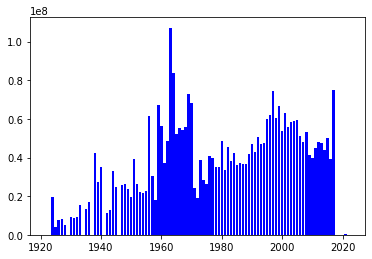

In [79]:
plt.bar(mov_year.year,mov_year.avg_mod_budget, color = 'b')

In [80]:
mov_month = pd.DataFrame(columns = ['month','number_movies','tot_budget','avg_budget','tot_revenue','avg_revenue','tot_mod_budget','avg_mod_budget','tot_infl_revenue','avg_infl_revenue'])

In [81]:
for j in range(1,13):
    mov_month.loc[j-1] = [j,0,0,0,0,0,0,0,0,0]
for j in mov_train.index:
    m = mov_train.loc[j,'month']
    mov_month.loc[m-1,'number_movies'] = mov_month.loc[m-1,'number_movies'] + 1
    mov_month.loc[m-1,'tot_revenue'] = mov_month.loc[m-1,'tot_revenue'] + mov_train.loc[j,'revenue']
    mov_month.loc[m-1,'tot_budget'] = mov_month.loc[m-1,'tot_budget'] + mov_train.loc[j,'budget']
    mov_month.loc[m-1,'tot_infl_revenue'] = mov_month.loc[m-1,'tot_infl_revenue'] + mov_train.loc[j,'infl_revenue']
    mov_month.loc[m-1,'tot_mod_budget'] = mov_month.loc[m-1,'tot_mod_budget'] + mov_train.loc[j,'mod_budget']

In [82]:
for j in mov_month.index:
    if mov_month.loc[j,'number_movies'] != 0:
        mov_month.loc[j,'avg_revenue'] = mov_month.loc[j,'tot_revenue']/mov_month.loc[j,'number_movies']
        mov_month.loc[j,'avg_budget'] = mov_month.loc[j,'tot_budget']/mov_month.loc[j,'number_movies']
        mov_month.loc[j,'avg_infl_revenue'] = mov_month.loc[j,'tot_infl_revenue']/mov_month.loc[j,'number_movies']
        mov_month.loc[j,'avg_mod_budget'] = mov_month.loc[j,'tot_mod_budget']/mov_month.loc[j,'number_movies']

In [83]:
mov_month

,month,number_movies,tot_budget,avg_budget,tot_revenue,avg_revenue,tot_mod_budget,avg_mod_budget,tot_infl_revenue,avg_infl_revenue
0,1,212,3061676944,1.44419e+07,6509838292,3.07068e+07,7.87727e+09,3.71569e+07,1.02742e+10,4.84634e+07
1,2,226,4166918462,1.84377e+07,13060290151,5.77889e+07,9.58787e+09,4.24242e+07,2.21277e+10,9.79101e+07
2,3,238,5666477416,2.38087e+07,17193465703,7.22415e+07,1.19327e+10,5.01375e+07,2.88752e+10,1.21325e+08
3,4,245,4611403894,1.88221e+07,14286969400,5.83142e+07,1.04585e+10,4.26879e+07,2.30128e+10,9.39298e+07
4,5,224,6400750443,2.85748e+07,20269249302,9.04877e+07,1.28808e+10,5.75036e+07,3.55522e+10,1.58715e+08
5,6,237,9053119023,3.81988e+07,30309074015,1.27886e+08,1.72048e+10,7.2594e+07,5.61275e+10,2.36825e+08
6,7,209,5829640276,2.7893e+07,19654403510,9.40402e+07,1.18689e+10,5.6789e+07,3.36306e+10,1.60912e+08
7,8,256,4508418476,1.7611e+07,10626740378,4.15107e+07,1.08949e+10,4.25581e+07,2.00482e+10,7.83131e+07
8,9,362,4884746560,1.34938e+07,12968389077,3.58243e+07,1.19955e+10,3.31366e+07,2.16642e+10,5.9846e+07
9,10,307,5673163742,1.84794e+07,12907091424,4.20426e+07,1.3438e+10,4.37721e+07,2.53823e+10,8.26785e+07


<BarContainer object of 12 artists>

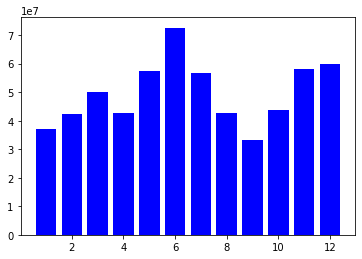

In [84]:
plt.bar(mov_month.month,mov_month.avg_mod_budget, color = 'b')

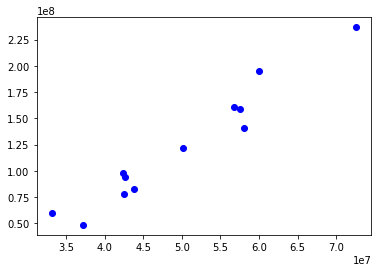

In [85]:
plt.scatter(mov_month.avg_mod_budget,mov_month.avg_infl_revenue, color = 'b')

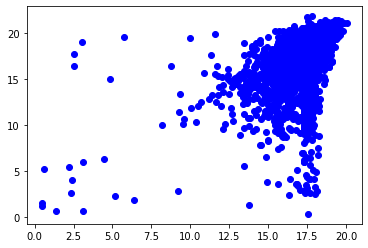

In [117]:
plt.scatter(mov_train.log_mod_budget,mov_train.log_infl_revenue, color = 'b')

In [86]:
mov_genre = pd.DataFrame(columns = ['genres','number_movies','tot_budget','avg_budget','tot_revenue','avg_revenue','tot_mod_budget','avg_mod_budget','tot_infl_revenue','avg_infl_revenue'])

In [87]:
print(genres)

{'Animation', 'War', 'Western', 'Drama', 'Music', 'Foreign', 'Thriller', 'History', 'Fantasy', 'Romance', 'Comedy', 'Documentary', 'Crime', 'Mystery', 'Horror', 'Family', 'Action', 'Adventure'}


In [88]:
count = 0
genre_index = {}
for j in genres:
    mov_genre.loc[count] = [j,0,0,0,0,0,0,0,0,0]
    genre_index[j]=count
    count = count + 1
for j in mov_train.index:
    for genre in genres:
        if mov_train.loc[j,genre] == 1:
            mov_genre.loc[genre_index[genre],'number_movies'] = mov_genre.loc[genre_index[genre],'number_movies'] + 1
            mov_genre.loc[genre_index[genre],'tot_revenue'] = mov_genre.loc[genre_index[genre],'tot_revenue'] + mov_train.loc[j,'revenue']
            mov_genre.loc[genre_index[genre],'tot_budget'] = mov_genre.loc[genre_index[genre],'tot_budget'] + mov_train.loc[j,'budget']
            mov_genre.loc[genre_index[genre],'tot_infl_revenue'] = mov_genre.loc[genre_index[genre],'tot_infl_revenue'] + mov_train.loc[j,'infl_revenue']
            mov_genre.loc[genre_index[genre],'tot_mod_budget'] = mov_genre.loc[genre_index[genre],'tot_mod_budget'] + mov_train.loc[j,'mod_budget']

In [89]:
mov_genre

,genres,number_movies,tot_budget,avg_budget,tot_revenue,avg_revenue,tot_mod_budget,avg_mod_budget,tot_infl_revenue,avg_infl_revenue
0,Animation,141,5967983384,0,20830507010,0,1.12922e+10,0,3.26488e+10,0
1,War,100,2673133410,0,4991586809,0,5.74447e+09,0,1.09954e+10,0
2,Western,43,819744461,0,2208937320,0,2.12025e+09,0,5.74833e+09,0
3,Drama,1531,25733940425,0,69516699191,0,6.34153e+10,0,1.37548e+11,0
4,Music,100,1315399141,0,4287089768,0,4.32297e+09,0,1.13931e+10,0
5,Foreign,31,40334367,0,58100126,0,7.58293e+08,0,1.01195e+08,0
6,Thriller,789,20873192826,0,53917610066,0,4.10459e+10,0,9.96459e+10,0
7,History,132,2997539637,0,5070546615,0,7.63507e+09,0,1.45518e+10,0
8,Fantasy,232,11039073847,0,34328096420,0,1.9452e+10,0,5.43757e+10,0
9,Romance,571,8944336886,0,30094559216,0,2.30712e+10,0,5.86233e+10,0


In [90]:
for j in mov_genre.index:
    if mov_genre.loc[j,'number_movies'] != 0:
        mov_genre.loc[j,'avg_revenue'] = mov_genre.loc[j,'tot_revenue']/mov_genre.loc[j,'number_movies']
        mov_genre.loc[j,'avg_budget'] = mov_genre.loc[j,'tot_budget']/mov_genre.loc[j,'number_movies']
        mov_genre.loc[j,'avg_infl_revenue'] = mov_genre.loc[j,'tot_infl_revenue']/mov_genre.loc[j,'number_movies']
        mov_genre.loc[j,'avg_mod_budget'] = mov_genre.loc[j,'tot_mod_budget']/mov_genre.loc[j,'number_movies']

<BarContainer object of 18 artists>

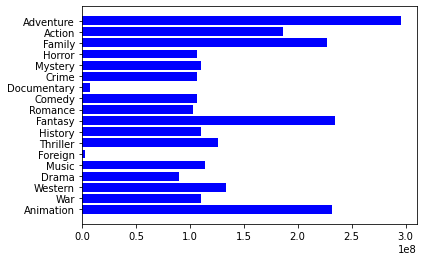

In [91]:
plt.barh(mov_genre.genres,mov_genre.avg_infl_revenue, color = 'b')

In [92]:
mov_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  604 non-null    object 
 1   budget                 3000 non-null   int64  
 2   genres                 2993 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   popularity             3000 non-null   float64
 8   poster_path            2999 non-null   object 
 9   production_companies   2844 non-null   object 
 10  production_countries   2945 non-null   object 
 11  release_date           3000 non-null   object 
 12  runtime                3000 non-null   float64
 13  spoken_languages       2980 non-null   object 
 14  status                 3000 non-null   object 
 15  titl

In [93]:
count_coll=0
count_non_coll=0
tot_rev_coll=0
tot_rev_noncoll=0
max_rev_coll=0
max_rev_noncoll=0
max_rev_coll_title=""
max_rev_noncoll_title=""
iscoll=mov_train.belongs_to_collection.isna()
for j in mov_train.index:
    if iscoll.loc[j]==True:
        count_coll=count_coll+1
        tot_rev_coll=tot_rev_coll+mov_train.loc[j,'infl_revenue']
        if mov_train.loc[j,'infl_revenue']> max_rev_coll:
            max_rev_coll=mov_train.loc[j,'infl_revenue']
            max_rev_coll_title=mov_train.loc[j,'title']

    else:
        count_non_coll=count_non_coll+1
        tot_rev_noncoll=tot_rev_noncoll+mov_train.loc[j,'infl_revenue']
        if mov_train.loc[j,'infl_revenue']> max_rev_noncoll:
            max_rev_noncoll=mov_train.loc[j,'infl_revenue']
            max_rev_noncoll_title=mov_train.loc[j,'title']

In [94]:
avg_rev_coll=tot_rev_coll/count_coll
print('Average infl revenue for movies belonging to collection is:'+ str(avg_rev_coll))
print('Max infl revenue for movies belonging to collection is:'+ str(max_rev_coll))
print(max_rev_coll_title)
avg_rev_noncoll=tot_rev_noncoll/count_non_coll
print('Average infl revenue for movies not belonging to collection is:'+ str(avg_rev_noncoll))
print('Max infl revenue for movies not belonging to collection is:'+ str(max_rev_noncoll))
print(max_rev_noncoll_title)


Average infl revenue for movies belonging to collection is:79056025.44282305
Max infl revenue for movies belonging to collection is:1535545141.7669635
Beauty and the Beast
Average infl revenue for movies not belonging to collection is:281109177.7655587
Max infl revenue for movies not belonging to collection is:2959837811.833648
The Exorcist


In [95]:
count_hp=0
count_nhp=0
tot_rev_hp=0
tot_rev_nhp=0
ishp=mov_train.homepage.isna()
for j in mov_train.index:
    if ishp.loc[j]==True:
        count_hp=count_hp+1
        tot_rev_hp=tot_rev_hp+mov_train.loc[j,'infl_revenue']
    else:
        count_nhp=count_nhp+1
        tot_rev_nhp=tot_rev_nhp+mov_train.loc[j,'infl_revenue']

In [96]:
avg_rev_hp=tot_rev_hp/count_hp
print('Average infl revenue for movies with homepage is:'+ str(avg_rev_hp))
avg_rev_nhp=tot_rev_nhp/count_nhp
print('Average infl revenue for movies not having homepage is:'+ str(avg_rev_nhp))

Average infl revenue for movies with homepage is:90827482.85332514
Average infl revenue for movies not having homepage is:182503732.08316234


In [100]:
prodcomps = pd.read_csv("./DataSets/prodcomps.csv")
prodcomps.head()

,name,MoviesN,AvgPop,AvgIMDB,Score
0,Syncopy,6,0.123597,0.853909,0.604709
1,DC Entertainment,7,0.245734,0.740741,0.581587
2,WingNut Films,9,0.069923,0.802469,0.581265
3,DC Comics,7,0.105628,0.774250,0.563346
4,Marvel Studios,8,0.174595,0.734568,0.562784


In [99]:
mov_train['prod_score']=0

In [101]:
for j in mov_train.index:
    set_prod=set()
    item = mov_train.loc[j,'production_companies']
    if(type(item)==str):
        x=re.finditer("(\'name\':\s\')(?P<name>[\w\.\s]*)(?=\')",item)
        for s in x:
            set_prod.add(s.groupdict()['name'])
    for comp in set_prod:
        mov_train.loc[j,'prod_score'] = mov_train.loc[j,'prod_score'] + prodcomps[prodcomps.name ==comp].Score.iloc[0]
mov_train.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,popularity,poster_path,production_companies,...,Documentary,Crime,Mystery,Horror,Family,Action,Adventure,phony,pred_revenue,prod_score
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,0,0,0,0,0,0,0,1,8.356875e+06,0.964294
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,0,0,0,0,1,0,0,1,1.368672e+08,0.483454
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,0,0,0,0,0,0,0,1,3.197547e+08,1.215237
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,...,0,0,0,0,0,0,0,1,2.370060e+07,0.000000
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,...,0,0,0,0,0,1,0,1,5.962719e+07,0.000000


In [ ]:
mov_train['phony']= 1

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
reg=LinearRegression(copy_X=True,fit_intercept=False)

In [118]:
x_train = mov_train[['log_mod_budget','actor_score','prod_score','runtime','popularity','imdb_rating','phony']]

In [119]:
y_train = mov_train['log_infl_revenue']

In [120]:
reg.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

In [121]:
reg.coef_

array([0.51884401, 0.22240689, 1.07716823, 0.00958441, 0.02163236,
       0.18207634, 3.8180556 ])

In [48]:
mov_test=pd.read_csv("./DataSets/mov_test.csv")
mov_test.head()   

,Unnamed: 0,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,imdb_rating,numVotes
0,0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",6.3,3581.0
1,1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,...,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",5.0,5683.0
2,2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,...,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",6.1,24943.0
3,3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,...,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de...",8.3,178038.0
4,4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",...,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de...",6.7,6855.0


In [49]:
mov_test['month']=0
mov_test['year']=0

In [50]:
mov_test.dropna(subset=['release_date'],inplace=True)
mov_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4397 entries, 0 to 4397
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4397 non-null   int64  
 1   id                     4397 non-null   int64  
 2   belongs_to_collection  877 non-null    object 
 3   budget                 4397 non-null   int64  
 4   genres                 4381 non-null   object 
 5   homepage               1420 non-null   object 
 6   imdb_id                4397 non-null   object 
 7   original_language      4397 non-null   object 
 8   original_title         4397 non-null   object 
 9   overview               4383 non-null   object 
 10  popularity             4397 non-null   float64
 11  poster_path            4397 non-null   object 
 12  production_companies   4140 non-null   object 
 13  production_countries   4296 non-null   object 
 14  release_date           4397 non-null   object 
 15  runt

In [51]:
mov_test.loc[4397,"release_date"]

'9/20/62'

In [52]:
for j in mov_test.index:
    string=mov_test.loc[j,'release_date']
    x=re.findall("([\d]{1,2})/([\d]{1,2})/([\d]{1,2})",string)
    mov_test.loc[j,"month"] = int(x[0][0])
    year = int(x[0][2])
    if year<23:
        mov_test.loc[j,"year"] = 2000 + year
    else:
        mov_test.loc[j,"year"] = 1900+ year

In [53]:
print(mov_test['year'].min())
print(mov_test['year'].max())

1923
2022


In [54]:
mov_test['infl_budget']=0
mov_test['infl_revenue']=0

In [55]:
for j in mov_test.index:
    x = mov_test.loc[j,"year"]
    y = inflation.loc[x-1900,'amount']
    mov_test.loc[j,'infl_budget'] = mov_test.loc[j,'budget']*35.48/y
    
mov_test.head()

,Unnamed: 0,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,title,Keywords,cast,crew,imdb_rating,numVotes,month,year,infl_budget,infl_revenue
0,0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",6.3,3581.0,7,2007,0.000000e+00,0
1,1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",5.0,5683.0,5,1958,9.076279e+05,0
2,2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,...,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",6.1,24943.0,5,1997,0.000000e+00,0
3,3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de...",8.3,178038.0,9,2010,9.293683e+06,0
4,4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de...",6.7,6855.0,2,2005,3.052043e+06,0


In [56]:
mov_test['mod_budget'] = mov_test['infl_budget']
mov_test.head()

,Unnamed: 0,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,Keywords,cast,crew,imdb_rating,numVotes,month,year,infl_budget,infl_revenue,mod_budget
0,0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,...,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",6.3,3581.0,7,2007,0.000000e+00,0,0.000000e+00
1,1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,...,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",5.0,5683.0,5,1958,9.076279e+05,0,9.076279e+05
2,2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,...,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",6.1,24943.0,5,1997,0.000000e+00,0,0.000000e+00
3,3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,...,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de...",8.3,178038.0,9,2010,9.293683e+06,0,9.293683e+06
4,4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",...,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de...",6.7,6855.0,2,2005,3.052043e+06,0,3.052043e+06


In [57]:
budget_zero = mov_test[mov_test['budget']==0]
for j in budget_zero.index:
    x = budget_zero.loc[j,'year']
    this_genres=set()
    item = budget_zero.loc[j,'genres']
    if(type(item)==str):
        y=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
        for s in y:
            this_genres.add(s.groupdict()['name'])
    total = 0
    total_2 = 0
    count = 0
    count_2 = 0
    for k in mov_test.index:
        if k not in budget_zero.index:
            if abs(mov_test.loc[k,'year'] - x)<= 3:
                total_2 = total_2 + mov_test.loc[k,'infl_budget']
                count_2 = count_2 + 1
                that_genres=set()
                item = mov_test.loc[k,'genres']
                if(type(item)==str):
                    y=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
                    for s in y:
                        that_genres.add(s.groupdict()['name'])
                    if len(this_genres.intersection(that_genres))!= 0:
                        total = total + mov_test.loc[k,'infl_budget']
                        count = count + 1
    if count == 0:
        average = total_2/count_2
    else:
        average = total/count
    mov_test.loc[j,'mod_budget'] = average

In [58]:
mov_test['num_good_actors']=0
for j in mov_test.index:
    set_actors=set()
    item = mov_test.loc[j,'cast']
    if(type(item)==str):
        x=re.finditer("(\'name\':\s\')(?P<name>[\w\.\s]*)(?=\')",item)
        for s in x:
            set_actors.add(s.groupdict()['name'])
    for actor in set_actors:
        if actor in good_actors['name'].values:
            mov_test.loc[j,'num_good_actors'] = mov_test.loc[j,'num_good_actors'] + 1

In [59]:
for genre in genres:
    mov_test[genre]=0
for j in mov_test.index:
    row_genres=set()
    item = mov_test.loc[j,'genres']
    if(type(item)==str):
        x=re.finditer("(\'name\':\s\')(?P<name>\w*)(?=\')",item)
        for s in x:
            row_genres.add(s.groupdict()['name'])
    for genre in row_genres:
        mov_test.loc[j,genre]=mov_test.loc[j,genre]+1
mov_test.head()

,Unnamed: 0,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,Fantasy,Romance,Comedy,Documentary,Crime,Mystery,Horror,Family,Action,Adventure
0,0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,...,1,0,0,0,0,0,0,1,0,1
1,1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,...,0,0,0,0,0,0,1,0,0,0
2,2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,...,0,1,1,0,0,0,0,0,0,0
3,3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,...,0,0,0,0,0,1,0,0,0,0
4,4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",...,0,0,0,1,0,0,0,0,0,0


In [60]:
mov_test['runtime'].fillna(mov_test['runtime'].mean(),inplace = True)

In [127]:
print('The MSE is',np.sum(np.power(y_train-y_pred,2))/(len(y_train)))

The MSE is 6.456115428160432


In [122]:
y_pred = reg.predict(x_train)

In [124]:
mov_train['log_pred_revenue']=pd.Series(y_pred)

In [125]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.32696272638054635

In [65]:
mov_train[['title','infl_revenue','pred_revenue']].head()

,title,infl_revenue,pred_revenue
0,Hot Tub Time Machine 2,1.548277e+07,8.356875e+06
1,The Princess Diaries 2: Royal Engagement,1.501068e+08,1.368672e+08
2,Whiplash,1.648347e+07,3.197547e+08
3,Kahaani,2.077131e+07,2.370060e+07
4,Marine Boy,5.451153e+06,5.962719e+07


In [107]:
mov_train['prod_score'].fillna(mov_train['prod_score'].mean(),inplace = True)

In [108]:
mov_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  604 non-null    object 
 1   budget                 3000 non-null   int64  
 2   genres                 2993 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   popularity             3000 non-null   float64
 8   poster_path            2999 non-null   object 
 9   production_companies   2844 non-null   object 
 10  production_countries   2945 non-null   object 
 11  release_date           3000 non-null   object 
 12  runtime                3000 non-null   float64
 13  spoken_languages       2980 non-null   object 
 14  status                 3000 non-null   object 
 15  titl